In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [59]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [60]:
a = np.array(df['weight'])
b= np.array(df['height'])
df['overweight']= (np.round((pow(a,2)/b),1)> 25).astype(int)

In [61]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [62]:
df[['cholesterol','gluc']] = (df[['cholesterol','gluc']] > 1).astype(int)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [63]:
df_feat=pd.melt(df, id_vars=["cardio"],value_vars=["active","alco","cholesterol","gluc","overweight","smoke"])


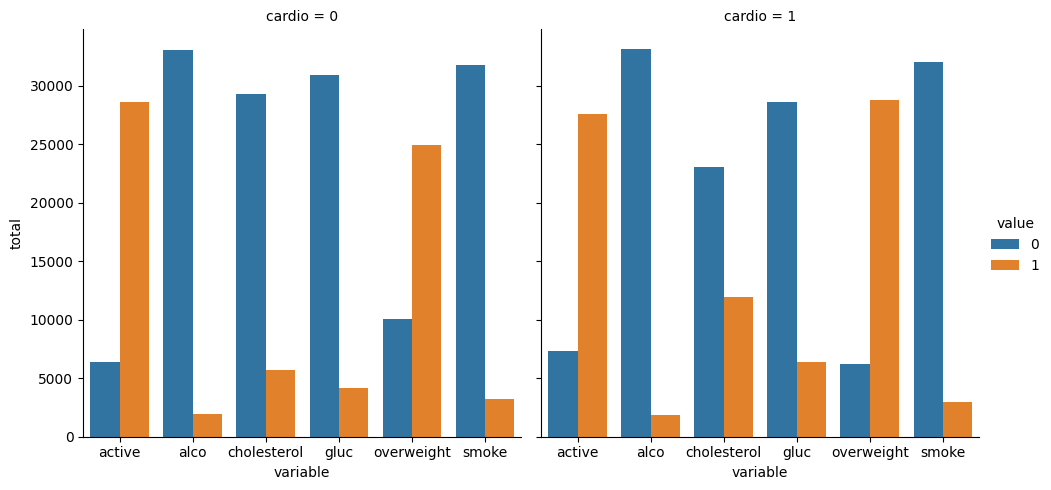

In [64]:
fig=sns.catplot(
    data=df_feat, x='variable',hue='value',col="cardio",
    kind="count",
).set(ylabel = 'total')
fig.savefig('catplot.png')


In [77]:
def draw_heat_map():    
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])&(df['height'] >= df['height'].quantile(0.025))&(df['height'] >= df['height'].quantile(0.975))
                &(df['weight'] >= df['weight'].quantile(0.025))&(df['weight'] <= df['weight'].quantile(0.975))]
    corr = df_heat.corr()
        

        # Generate a mask for the upper triangle
    
    mask = np.triu(corr)
        

        # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(7, 5))
        

        # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)
    

        # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig



In [78]:
draw_heat_map

<function __main__.draw_heat_map()>